In [2]:
!pip install pycirclize # Install Pycirclize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.8 MB/s eta 0:00:00


In [5]:
from pycirclize import Circos
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# First Circos chart

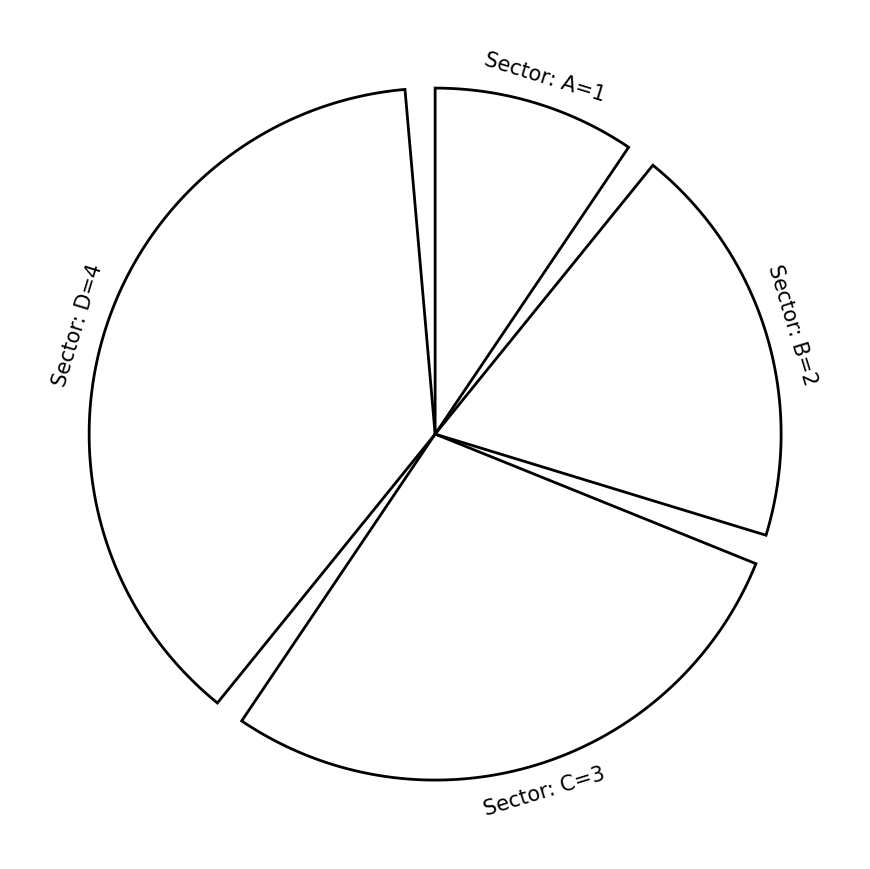

In [6]:
# Initialize circos sectors
sectors = {"A": 1, "B": 2, "C": 3, "D": 4}
circos = Circos(sectors, space=5)

# Loop the sectors and generate the graph
for sector in circos.sectors:
    sector.axis(lw=2)
    sector.text(f"Sector: {sector.name}={sector.size}", size=15)

# Plot it
fig = circos.plotfig()

# Visualising the Traffic Volume

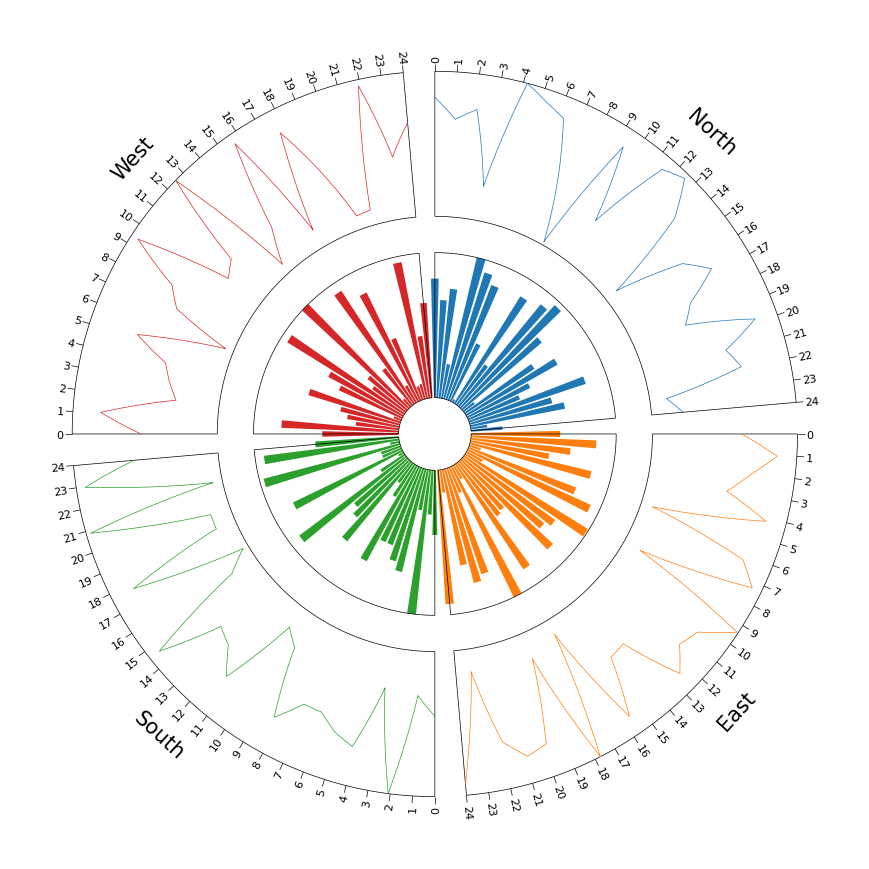

In [7]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

# Sectors represent different areas in a city, with the x-axis representing 24 hours of the day
sectors = {"North": 24, "East": 24, "South": 24, "West": 24}
circos = Circos(sectors, space=5)

for sector in circos.sectors:
    # Simulate x (24 hours) and y (number of vehicles)
    x = np.linspace(0, 24, 24)
    y = np.random.randint(10, 1000, 24)  # Simulated hourly vehicle numbers

    # Plot bars for the number of vehicles passed the intersection
    bar_track = sector.add_track((10, 50))
    bar_track.bar(x, y)

    # Plot a line chart showing traffic volume trends throughout the day
    line_track = sector.add_track((60, 100))
    line_track.xticks_by_interval(1, label_orientation='vertical')
    line_track.line(x, y)

    # Plot sector name for identification
    sector.text(sector.name, r=110, size=15)

    # Add enclosed axis of the charts in the sectors
    line_track.axis()
    bar_track.axis()

fig = circos.plotfig()

# Players who played all IPL seasons (2008-2023)

In [24]:
# Load the processed data (contains players' runs and matches for all IPL seasons)
data_players_runs = pd.read_csv("/content/drive/MyDrive/HOWZZAT/players_runs_all_seasons.csv")
data_players_matches = pd.read_csv("/content/drive/MyDrive/HOWZZAT/players_matches_all_seasons.csv")

In [25]:
data_players_runs.set_index('player', inplace=True)
data_players_matches.set_index('player', inplace=True)

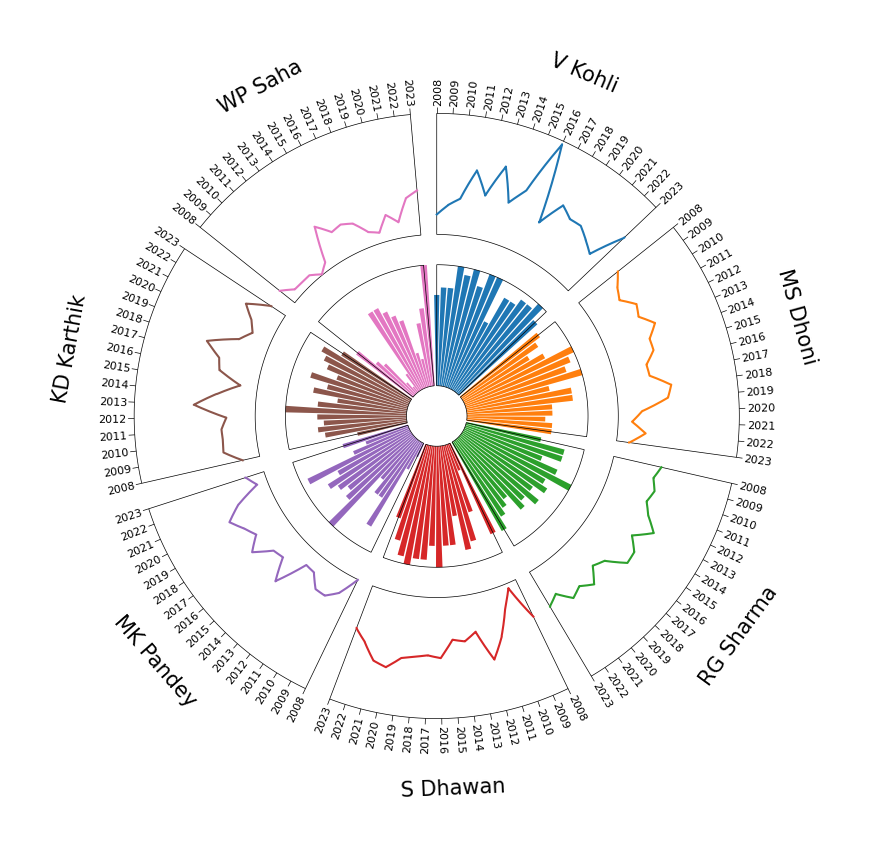

In [32]:
# ABSOLUTE RUNS
# Sectors represent different player, with the x-axis representing seasons
sectors_end = dict(zip(data_players_runs.index, [len(data_players_runs.columns)-1] * len(data_players_runs.index)))
sectors_start = dict(zip(data_players_runs.index, [2008] * len(data_players_runs.index)))
circos = Circos(sectors_end, space=5, sector2start_pos=sectors_start)

for sector in circos.sectors:

  # Data
  x = data_players_matches.columns.astype(int).tolist()
  y = data_players_matches.loc[sector.name]
  z = data_players_runs.loc[sector.name].tolist()

  # Plot bars for the number of vehicles passed the intersection
  bar_track = sector.add_track((10, 50))
  bar_track.bar(x, y)

  # Plot a line chart showing traffic volume trends throughout the day
  line_track = sector.add_track((60, 100))
  line_track.xticks_by_interval(1, label_orientation='vertical')
  line_track.line(x, z, vmin=0,vmax=1000,lw=1.5,ls='-')

  # Plot sector name for identification
  sector.text(sector.name, r=120, size=15)

  # Add enclosed axis of the charts in the sectors
  line_track.axis()
  bar_track.axis()

fig = circos.plotfig()

In [33]:
# Normalizing the data
# data_players_runs_org=data_players_runs
# copy the data
data_players_runs = data_players_runs.copy()

# apply normalization techniques
for column in data_players_runs.columns:
    data_players_runs[column] = data_players_runs[column]  / data_players_runs[column].abs().max()

data_players_runs

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
player,,,,,,,,,,,,,,,,
V Kohli,0.398551,0.679558,0.759901,1.000000,0.639719,1.000000,0.877751,1.000000,1.000000,0.643006,1.000000,0.890595,0.762136,0.689949,0.741304,1.000000
MS Dhoni,1.000000,0.917127,0.710396,0.703770,0.629174,0.721440,0.907090,0.736634,0.291881,0.605428,0.858491,0.798464,0.323625,0.194208,0.504348,0.162754
RG Sharma,0.975845,1.000000,1.000000,0.667864,0.760984,0.841941,0.953545,0.954455,0.502569,0.695198,0.539623,0.777351,0.540453,0.649063,0.582609,0.519562
S Dhawan,0.821256,0.110497,0.472772,0.718133,1.000000,0.486698,0.921760,0.699010,0.514902,1.000000,0.937736,1.000000,1.000000,1.000000,1.000000,0.583725
MK Pandey,0.007246,0.464088,0.616337,0.441652,0.251318,0.212833,1.000000,0.445545,0.254882,0.826722,0.535849,0.662188,0.687702,0.497445,0.191304,0.250391
KD Karthik,0.350242,0.795580,0.688119,0.506284,0.418278,0.798122,0.794621,0.279208,0.344296,0.753653,0.939623,0.487524,0.273463,0.379898,0.717391,0.219092
WP Saha,0.384058,0.198895,0.165842,0.122083,0.010545,0.109546,0.885086,0.493069,0.277492,0.488518,0.230189,0.165067,0.346278,0.223169,0.689130,0.580595


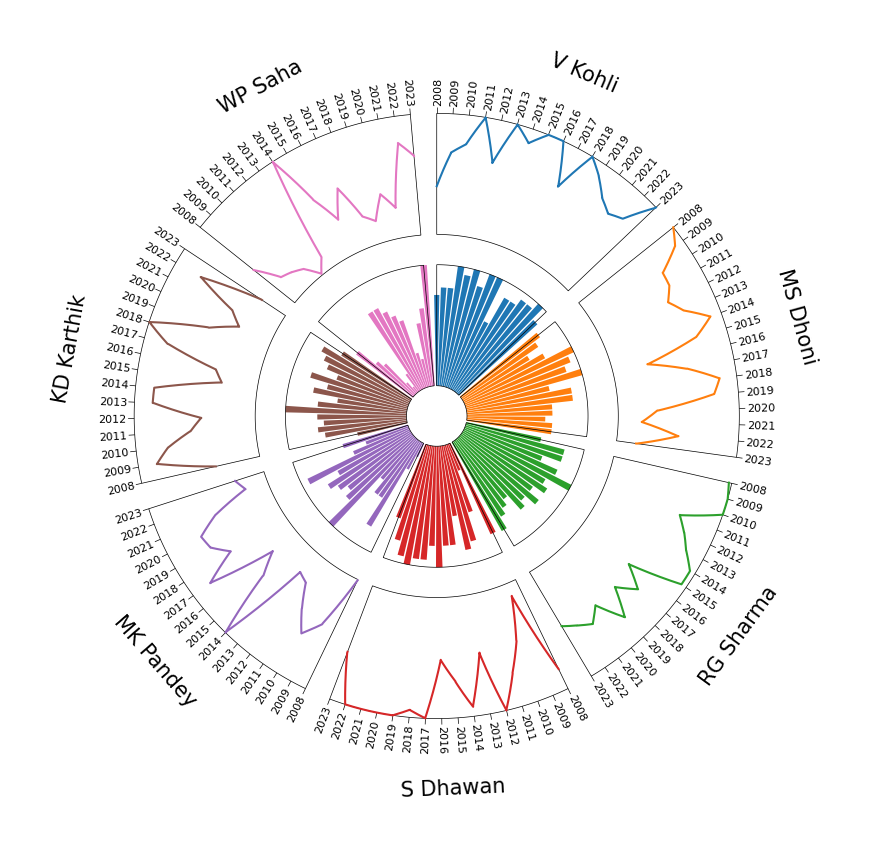

In [35]:
# NORMALIZE RUNS
# Sectors represent different player, with the x-axis representing seasons
sectors_end = dict(zip(data_players_runs.index, [len(data_players_runs.columns)-1] * len(data_players_runs.index)))
sectors_start = dict(zip(data_players_runs.index, [2008] * len(data_players_runs.index)))
circos = Circos(sectors_end, space=5, sector2start_pos=sectors_start)

for sector in circos.sectors:

  # Data
  x = data_players_matches.columns.astype(int).tolist()
  y = data_players_matches.loc[sector.name]
  z = data_players_runs.loc[sector.name].tolist()

  # Plot bars for the number of vehicles passed the intersection
  bar_track = sector.add_track((10, 50))
  bar_track.bar(x, y)

  # Plot a line chart showing traffic volume trends throughout the day
  line_track = sector.add_track((60, 100))
  line_track.xticks_by_interval(1, label_orientation='vertical')
  line_track.line(x, z,lw=1.5,ls='-')

  # Plot sector name for identification
  sector.text(sector.name, r=120, size=15)

  # Add enclosed axis of the charts in the sectors
  line_track.axis()
  bar_track.axis()

fig = circos.plotfig()